In [1]:
import sys
import os
from torch.utils.data import DataLoader
sys.path.append("..")
from tqdm import tqdm
import shutil
import torch
import numpy as np
import pandas as pd

from utils import train_test_split, create_metadata_df, measurements_to_df
from dataset_xy import CARLADatasetXY
from dataset import CARLADataset
from data_preprocessing import preprocessing, transform_lidar_bev

import json

from PIL import Image

/Users/julianvonklitzing/miniforge3/envs/carla/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_data = os.path.join("..", "..", "data", "data")
# path_data = "../../data/data/cycl_dataset_23_11/Routes_non-straight-junction-Scen4_Town07_junction_Seed2000/non-straight-junction-Scen4_Town07_junction_route74_11_24_00_29_14"
# path_data = os.path.join("..", "..", "data", "data", "rr_dataset_23_11")
#path_data = os.path.join("..", "..", "data", "data_prep_npy")

config_xy = {"used_inputs": ["rgb", "lidar_prep", "measurements"], 
        "used_measurements": ["speed", "steer", "throttle", "brake", "command"],
        "y": ["brake", "steer", "throttle"],
        "seq_len": 1
        }

# Create df_meta 
df_meta_data = create_metadata_df(path_data, config_xy["used_inputs"])

# Create Dataset & DataLoader
dataset = CARLADatasetXY(root_dir=path_data, df_meta_data=df_meta_data, config=config_xy)

# Towns frequencies on entire set

In [3]:
df_meta_data["dir"].str.extract("(Town[0-9][0-9])").value_counts(normalize=True)

Town04    0.235217
Town05    0.215354
Town03    0.159882
Town06    0.138998
Town07    0.087498
Town10    0.073697
Town01    0.048266
Town02    0.041087
dtype: float64

In [4]:
df_meta_data_stats = df_meta_data["dir"].apply(lambda x: x.split(os.sep)[4]).to_frame("dir_first_level")
df_meta_data_stats["town"] = df_meta_data["dir"].str.extract("(Town[0-9][0-9])")
df_meta_data_stats = df_meta_data_stats.groupby("dir_first_level")["town"].value_counts(normalize=True).to_frame("freq")

In [48]:
df_meta_data_stats

freq
dir_first_level    town            
coke_dataset_23_11 Town05  0.319508
                   Town04  0.280574
                   Town06  0.125492
                   Town03  0.080123
                   Town02  0.061230
...                             ...
rl_dataset_23_11   Town03  0.083897
                   Town10  0.078530
rr_dataset_23_11   Town06  0.515000
                   Town04  0.415185
                   Town05  0.069815

[86 rows x 1 columns]

In [6]:
df_measurements = measurements_to_df(dataset)

100%|██████████| 258816/258816 [10:41<00:00, 403.44it/s]  


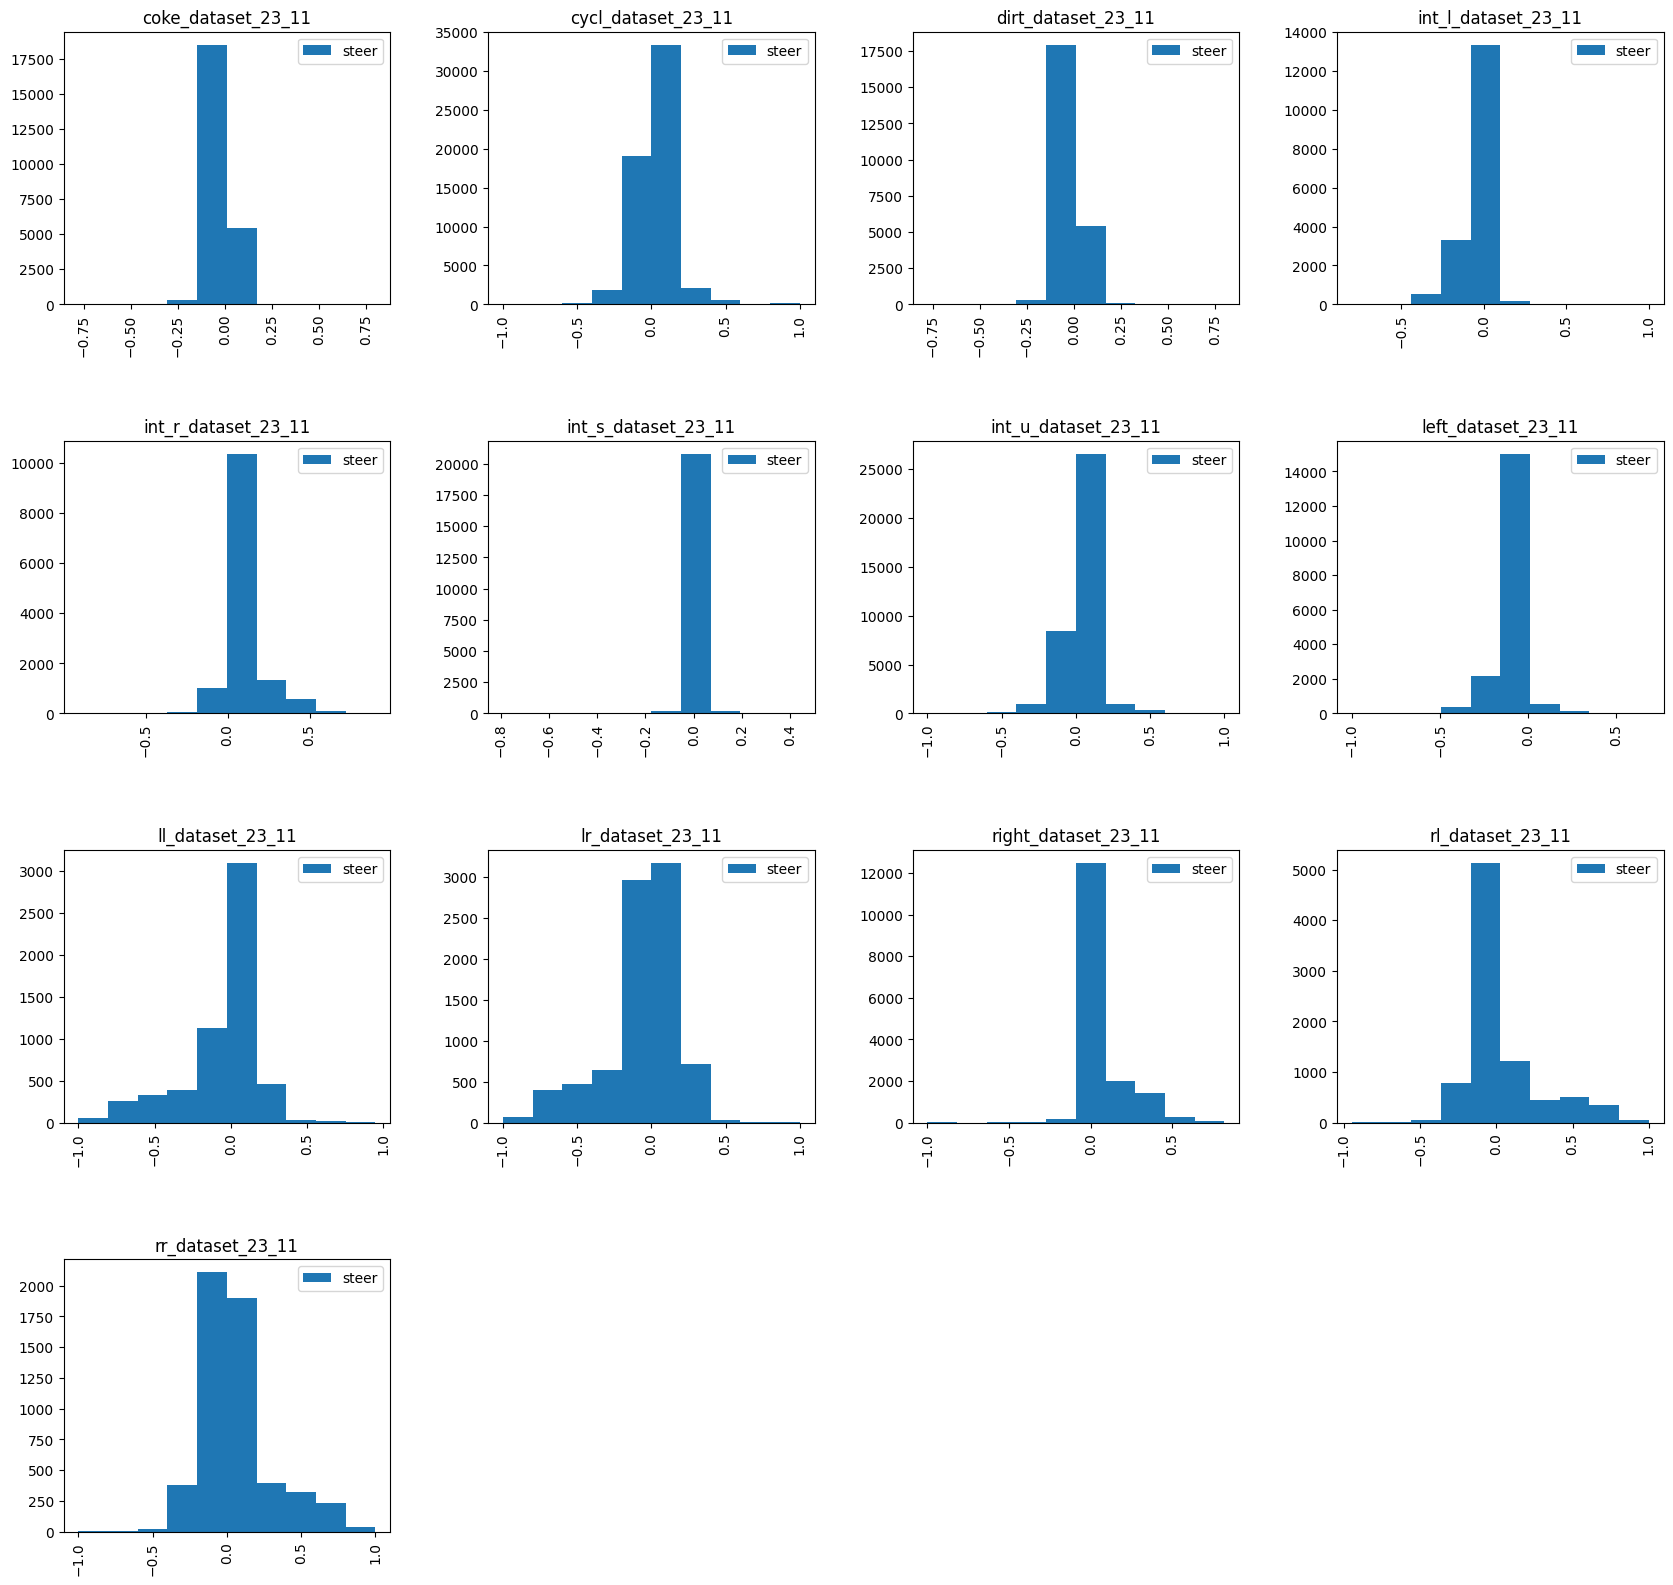

In [50]:
ax = df_measurements.hist(by="dir", column="steer", figsize=(20, 20), legend=True)

In [21]:
import cv2

In [38]:
df_meta_data[df_meta_data["dir"] == route_rand]

,dir,rgb,lidar_prep,measurements
110595,../../data/data/int_u_dataset_23_11/Routes_Sce...,0000.png,0000.png,0000.json
110596,../../data/data/int_u_dataset_23_11/Routes_Sce...,0001.png,0001.png,0001.json
110597,../../data/data/int_u_dataset_23_11/Routes_Sce...,0002.png,0002.png,0002.json
110598,../../data/data/int_u_dataset_23_11/Routes_Sce...,0003.png,0003.png,0003.json
110599,../../data/data/int_u_dataset_23_11/Routes_Sce...,0004.png,0004.png,0004.json
110600,../../data/data/int_u_dataset_23_11/Routes_Sce...,0005.png,0005.png,0005.json
110601,../../data/data/int_u_dataset_23_11/Routes_Sce...,0006.png,0006.png,0006.json
110602,../../data/data/int_u_dataset_23_11/Routes_Sce...,0007.png,0007.png,0007.json
110603,../../data/data/int_u_dataset_23_11/Routes_Sce...,0008.png,0008.png,0008.json
110604,../../data/data/int_u_dataset_23_11/Routes_Sce...,0009.png,0009.png,0009.json


In [34]:
route_rand[119107]


'../../data/data/int_u_dataset_23_11/Routes_Scenenario10_routes_Town04_junction_Seed6000/Scenenario10_routes_Town04_junction_route27_11_23_23_10_45'

In [23]:
df_meta_data["dir"][0]

'../../data/data/cycl_dataset_23_11/Routes_non-straight-junction-Scen4_Town07_junction_Seed2000/non-straight-junction-Scen4_Town07_junction_route28_11_23_22_00_23'

In [45]:
def render_example_video_from_folder_name(df_meta_data, folder="int_u_dataset_23_11"):
    route_rand = df_meta_data[df_meta_data["dir"].str.contains("int_u_dataset_23_11")].sample(1)["dir"].iloc[0]
    df_meta_data_filt = df_meta_data[df_meta_data["dir"] == route_rand]

    frameSize = (160, 960)
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(f'{folder}.mp4', fourcc, 2, frameSize) #  cv2.VideoWriter_fourcc(*'DIVX')

    for idx in df_meta_data_filt.index.values:
        path_load = os.path.join(df_meta_data_filt["dir"][idx], "rgb", df_meta_data_filt["rgb"][idx])
        img = cv2.imread(path_load)
        out.write(img)
    out.release()

In [46]:
render_example_video_from_folder_name(df_meta_data, folder="int_u_dataset_23_11")

# Split

In [2]:
def train_test_split(df_meta_data, towns=None, train_size_random=0.8, seed=None):
    df_meta_data = df_meta_data.sort_values(by=df_meta_data.columns.values[:2].tolist())
    if towns:
        df_train = df_meta_data[df_meta_data["dir"].str.contains("|".join(towns["train"]))]
        df_test = df_meta_data[df_meta_data["dir"].str.contains("|".join(towns["test"]))]
    return df_train, df_test

In [16]:
df_meta_data = df_meta_data.sort_values(by=df_meta_data.columns.values[:2].tolist())

In [51]:
len(df_meta_data)

258816

In [66]:
df_train = df_meta_data[df_meta_data["dir"].str.contains("|".join(["Town01", "Town02", "Town03", "Town04", "Town05", "Town07", "Town08", "Town09", "Town10"]))]
df_test = df_meta_data[df_meta_data["dir"].str.contains("|".join(["Town06"]))]

In [74]:
len_total = len(df_train) + len(df_test)
len_total

258816

In [73]:
ratio_test = len(df_test) / len_total
ratio_test

0.13899836177052424

In [69]:
df_test

,dir,rgb,lidar_prep,measurements
9805,../../data/data/cycl_dataset_23_11/Routes_non-...,0000.png,0000.png,0000.json
9806,../../data/data/cycl_dataset_23_11/Routes_non-...,0001.png,0001.png,0001.json
9807,../../data/data/cycl_dataset_23_11/Routes_non-...,0002.png,0002.png,0002.json
9808,../../data/data/cycl_dataset_23_11/Routes_non-...,0003.png,0003.png,0003.json
9809,../../data/data/cycl_dataset_23_11/Routes_non-...,0004.png,0004.png,0004.json
...,...,...,...,...
257906,../../data/data/dirt_dataset_23_11/Routes_Scen...,0056.png,0056.png,0056.json
257907,../../data/data/dirt_dataset_23_11/Routes_Scen...,0057.png,0057.png,0057.json
257908,../../data/data/dirt_dataset_23_11/Routes_Scen...,0058.png,0058.png,0058.json
257909,../../data/data/dirt_dataset_23_11/Routes_Scen...,0059.png,0059.png,0059.json


In [70]:
# number additional samples needed for df_test to be 20%
num_add_needed = 0.2 * len_total - len(df_test)
num_add_needed

15788.200000000004

In [ ]:
# TODO: calculate num_add_needed

In [71]:
df_test_additional = pd.concat([df_train, df_train.sample(int(num_add_needed))])

In [72]:
len(df_test_additional) / (len(df_train) + len(df_test_additional))

0.5171062040869395

# Check distributions